In [8]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

import tensorflow_hub as hub
import tensorflow_datasets as tfds

from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [9]:
import keras
from keras.applications.densenet import DenseNet201

from sklearn.metrics import confusion_matrix
#from keras.layers.core import Dense, Activation
from tensorflow.keras.layers import Dense, Flatten
from keras.metrics import categorical_crossentropy
from keras.metrics import binary_crossentropy
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.mobilenet import preprocess_input
from tensorflow.keras.preprocessing import image_dataset_from_directory
import tensorflow as tf
from keras.preprocessing import image

In [11]:
train_datagen = image.ImageDataGenerator(
    rescale=1./255,
    shear_range = 0.3,
    zoom_range = 0.3,
    horizontal_flip = True,
)
validation_datagen = image.ImageDataGenerator(
    rescale = 1./255
)

In [12]:
train = train_datagen.flow_from_directory(
    '/kaggle/input/flower-dataset/train',
    target_size = (224, 224),
    batch_size = 32,
    class_mode = 'categorical'
)

validation = validation_datagen.flow_from_directory(
    '/kaggle/input/flower-dataset/validation',
    target_size = (224, 224),
    batch_size = 32,
    class_mode = 'categorical'
)

test = validation_datagen.flow_from_directory(
    '/kaggle/input/flower-dataset/test',
    target_size = (224, 224),
    batch_size = 32,
    shuffle = False,
    class_mode = 'categorical'
)

Found 14160 images belonging to 5 classes.
Found 320 images belonging to 5 classes.
Found 200 images belonging to 5 classes.


In [13]:
DenseNet201 = tf.keras.applications.DenseNet201(
    include_top=False,
    weights = 'imagenet',
    input_shape=(224,224,3),
    )

In [14]:
DenseNet201.trainable = False

In [15]:
model = tf.keras.models.Sequential([
  DenseNet201,
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dropout(0.8),
  tf.keras.layers.Dense(units=1024, activation='relu'),
  tf.keras.layers.Dense(units=512, activation='relu'),
  tf.keras.layers.Dense(units=5, activation='softmax'),
])

In [16]:
model.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet201 (Functional)    (None, 7, 7, 1920)        18321984  
                                                                 
 flatten (Flatten)           (None, 94080)             0         
                                                                 
 dropout (Dropout)           (None, 94080)             0         
                                                                 
 dense (Dense)               (None, 1024)              96338944  
                                                                 
 dense_1 (Dense)             (None, 512)               524800    
                                                                 
 dense_2 (Dense)             (None, 5)                 2565      
                                                                 
Total params: 115188293 (439.41 MB)
Trainable params: 96

In [17]:
history = model.fit(
    x = train,
    validation_data = validation,
    epochs = 10
)

Epoch 1/10
443/443 [==============================] - 278s 577ms/step - loss: 1.3999 - accuracy: 0.6327 - val_loss: 0.7157 - val_accuracy: 0.7344
Epoch 2/10
443/443 [==============================] - 214s 484ms/step - loss: 0.7608 - accuracy: 0.7068 - val_loss: 0.6323 - val_accuracy: 0.7781
Epoch 3/10
443/443 [==============================] - 213s 481ms/step - loss: 0.7019 - accuracy: 0.7256 - val_loss: 0.7078 - val_accuracy: 0.7281
Epoch 4/10
443/443 [==============================] - 214s 483ms/step - loss: 0.6676 - accuracy: 0.7420 - val_loss: 0.7268 - val_accuracy: 0.7188
Epoch 5/10
443/443 [==============================] - 213s 481ms/step - loss: 0.6331 - accuracy: 0.7537 - val_loss: 0.5949 - val_accuracy: 0.7719
Epoch 6/10
443/443 [==============================] - 212s 477ms/step - loss: 0.6076 - accuracy: 0.7663 - val_loss: 0.6323 - val_accuracy: 0.7625
Epoch 7/10
443/443 [==============================] - 210s 473ms/step - loss: 0.5914 - accuracy: 0.7710 - val_loss: 0.5383 -

In [18]:
#Evaluate the loss and accuracy
loss, accuracy = model.evaluate(test)

# Print the accuracy
print("Accuracy: " + str(accuracy))
# Print the loss
print("Loss: " + str(loss))

7/7 [==============================] - 4s 601ms/step - loss: 0.8939 - accuracy: 0.7300
Accuracy: 0.7300000190734863
Loss: 0.8938601613044739


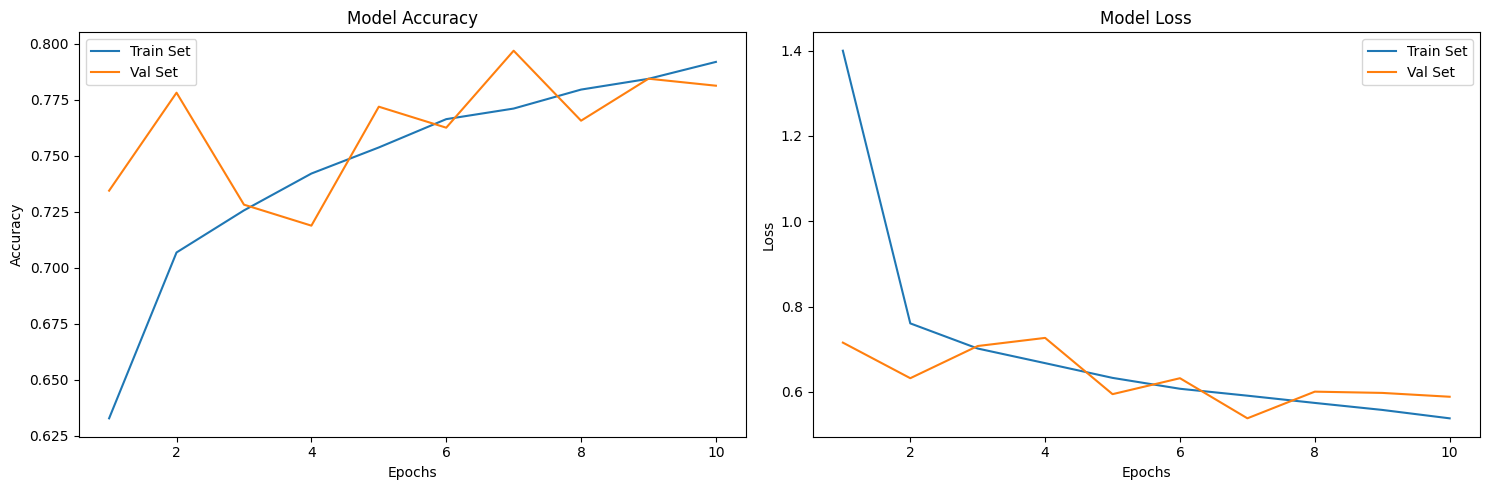

In [19]:
acc =history.history['accuracy']
val_acc =history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(1, len(history.epoch) + 1)

plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Set')
plt.plot(epochs_range, val_acc, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Set')
plt.plot(epochs_range, val_loss, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')

plt.tight_layout()
plt.show()

In [20]:
test.class_indices

{'daisy': 0, 'dandelion': 1, 'roses': 2, 'sunflowers': 3, 'tulips': 4}

In [21]:
import numpy as np
from sklearn import metrics

predictions = model.predict(test)
predicted_classes = np.argmax(predictions, axis = 1)
true_classes = test.classes
class_labels = ['daisy','dandelion','roses','sunflowers','tulips']
report = metrics.classification_report(true_classes, predicted_classes, target_names = class_labels)
print(report)

7/7 [==============================] - 4s 151ms/step
              precision    recall  f1-score   support

       daisy       0.78      0.78      0.78        40
   dandelion       0.70      0.88      0.78        40
       roses       0.72      0.57      0.64        40
  sunflowers       0.79      0.75      0.77        40
      tulips       0.68      0.68      0.68        40

    accuracy                           0.73       200
   macro avg       0.73      0.73      0.73       200
weighted avg       0.73      0.73      0.73       200



<Axes: >

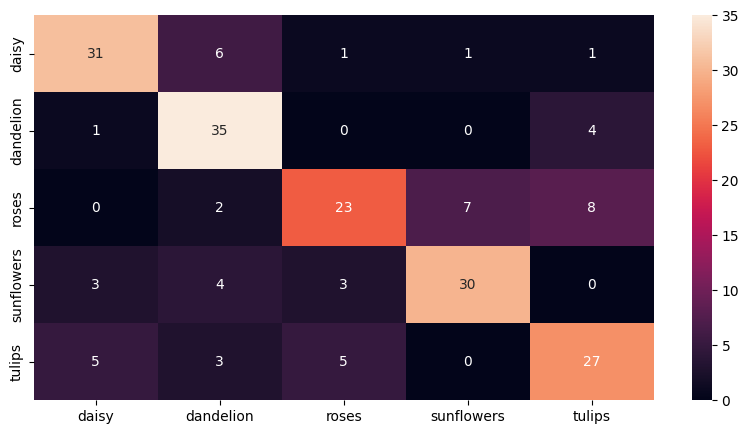

In [22]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

cm = metrics.confusion_matrix(true_classes, predicted_classes)
df_cm = pd.DataFrame(cm, index = [i for i in [ 'daisy','dandelion','roses','sunflowers','tulips']],
                  columns = [i for i in ['daisy','dandelion','roses','sunflowers','tulips']])
plt.figure(figsize = (10,5))
sn.heatmap(df_cm, annot=True, fmt='d')